In [2]:
import numpy as np 
import pandas as pd 
import matplotlib as mlp
import seaborn as sns 
pd.set_option("display.max_rows", None, "display.max_columns", None)
from sklearn.model_selection import train_test_split

In [3]:
df1 = pd.read_excel('C:\\Users\\Dell\\Desktop\\Soil Moisture Prediction\\Sm Training feature 2d.xlsx')

In [19]:
#keeping only relevant columns 
df1 = df1[['Date', 'T_max', 'T_min', 'Rainfall_mm', 'Rainfall_NRSC_mm', 'Evp_mm','Soil_Moisture_prev' ,'Soil_Moisture_perc']]

In [20]:
#extract date number 
df1['day_of_month'] = df1['Date'].astype('str').str[-2:]
df1['day_of_month'] = df1['day_of_month'].astype('float')

In [21]:
#extract month num 
df1['month_of_year'] = df1['Date'].astype('str').str[5:7]
df1['month_of_year'] = df1['month_of_year'].astype('float')

In [22]:
#keeping only relevant columns 
df2 = df1[[ 'day_of_month', 'month_of_year','T_max', 'T_min', 'Rainfall_mm', 'Rainfall_NRSC_mm', 'Evp_mm','Soil_Moisture_prev', 'Soil_Moisture_perc' ]]

In [23]:
#dropping Nulls 
df2.dropna(inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [24]:
#Mean
df2.mean()

day_of_month          15.656552
month_of_year          6.500690
T_max                 31.949680
T_min                  6.028845
Rainfall_mm            3.092297
Rainfall_NRSC_mm       2.346526
Evp_mm                 1.507769
Soil_Moisture_prev    19.904934
Soil_Moisture_perc    19.954597
dtype: float64

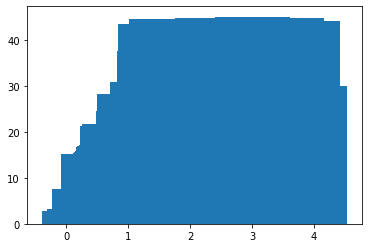

In [25]:
#visualize the variation of soil mosisture with evapotranspiration 

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df2.Evp_mm, height=df2.Soil_Moisture_perc)

# Display the plot
plt.show()

C:\Users\Dell\AppData\Local\Temp/ipykernel_6164/3654614415.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


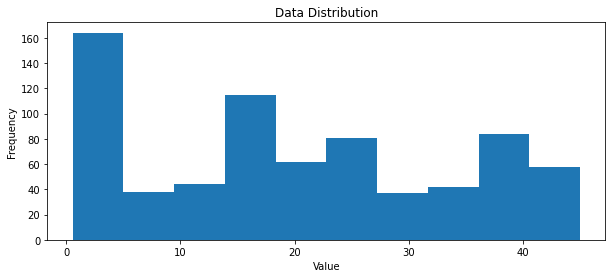

In [26]:
#Histogram to see distribution of soil moisture 

# Get the variable to examine
var_data = df2['Soil_Moisture_perc']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

C:\Users\Dell\AppData\Local\Temp/ipykernel_6164/2336636775.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


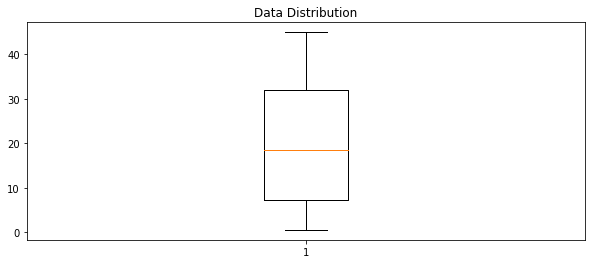

In [27]:
# Get the variable to examine
var = df2['Soil_Moisture_perc']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

In [28]:
#remove outliers from all such rows which have atleast one outlier 
from scipy import stats

df3 = df2[(np.abs(stats.zscore(df2)) < 3).all(axis=1)]

In [29]:
# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = df3[['day_of_month', 'month_of_year','T_max', 'T_min', 'Rainfall_mm', 'Rainfall_NRSC_mm','Evp_mm','Soil_Moisture_prev']].values, df3['Soil_Moisture_perc'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [30]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [31]:
#Linear Regression polynomial 

In [49]:
hypem_list = [1,2,3,4]
r2_list = {}
for i in hypem_list:
    pipeline = Pipeline(steps=[('scaler', StandardScaler()),('transformer', PolynomialFeatures(degree = i)),('regressor', LinearRegression())])
    model = pipeline.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    r2_list[i] = r2
    #maximum r2_score degree 
    x = max(zip(r2_list.values(), r2_list.keys()))[1]

In [37]:
r2_list

{1: 0.9629729030320089,
 2: 0.9661392409148843,
 3: 0.8704111844880158,
 4: -1.5553040352694388e+16}

In [50]:
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()),('transformer', PolynomialFeatures(degree = x)),('regressor', LinearRegression())])

In [25]:
# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, y_train)
print (model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('transformer', PolynomialFeatures()),
                ('regressor', LinearRegression())])


In [26]:
# Get predictions
predictions = model.predict(X_test)

In [27]:
 #Next to next day predictions 
from sklearn.metrics import mean_squared_error, r2_score
# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 6.5278110589044385
RMSE: 2.554958132514981
R2: 0.9661392409148843


In [51]:
#Random Forest Regressor 

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
hypem_list = [6,7,8,9,10,11]
r2_list = {}
for i in hypem_list:
    pipeline_rf = Pipeline(steps=[('scaler', StandardScaler()),('regressor', RandomForestRegressor(n_estimators = i))])
    model_rf = pipeline_rf.fit(X_train, y_train)
    predictions_rf = model_rf.predict(X_test)
    r2 = r2_score(y_test, predictions_rf)
    r2_list[i] = r2
    

In [56]:
r2_list

{6: 0.962065937538586,
 7: 0.9580191047028929,
 8: 0.9585554695395205,
 9: 0.9622205748727659,
 10: 0.9614060962732742,
 11: 0.9622169153532507}

In [30]:
# Create preprocessing and training pipeline
pipeline_rf = Pipeline(steps=[('scaler', StandardScaler()),('regressor', RandomForestRegressor(n_estimators = 8))])

In [31]:
# fit the pipeline to train a linear regression model on the training set
model_rf = pipeline_rf.fit(X_train, y_train)
print (model_rf)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(n_estimators=8))])


In [32]:
# Get predictions
predictions_rf = model_rf.predict(X_test)

In [33]:
#Next to nxt day predictions 
from sklearn.metrics import mean_squared_error, r2_score
# Display metrics
mse = mean_squared_error(y_test, predictions_rf)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions_rf)
print("R2:", r2)

MSE: 7.6216832942082355
RMSE: 2.7607396281084235
R2: 0.9604651575360472


In [34]:
# Support Vector Machines 

In [35]:
from sklearn.svm import SVR

In [50]:
hypem_list = ['poly', 'rbf', 'sigmoid']
r2_list = []
for i in hypem_list:
    pipeline_svm = Pipeline(steps=[('scaler', StandardScaler()),('regressor', SVR(kernel = i))])
    model_svm = pipeline_svm.fit(X_train, y_train)
    predictions_svm = model_svm.predict(X_test)
    r2 = r2_score(y_test, predictions_svm)
    r2_list.append(r2)  

In [51]:
r2_list

[0.8830710985826032, 0.9117250170535188, 0.852400376566029]

In [36]:
# Create preprocessing and training pipeline
pipeline_svm = Pipeline(steps=[('scaler', StandardScaler()),('regressor', SVR(kernel = 'linear'))])

# fit the pipeline to train a linear regression model on the training set
model_svm = pipeline_svm.fit(X_train, y_train)
print (model_svm)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', SVR(kernel='linear'))])


In [37]:
# Get predictions 
predictions_svm = model_svm.predict(X_test)

In [38]:
#Next to next day predictions 
from sklearn.metrics import mean_squared_error, r2_score
# Display metrics
mse = mean_squared_error(y_test,predictions_svm)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions_svm)
print("R2:", r2) 

MSE: 7.804672781347331
RMSE: 2.7936844455570373
R2: 0.9595159629464346
